# Цены на жильё в Калифорнии

#### О датасете:
* Данные касаются домов, найденных в конкретном округе Калифорнии, и некоторых сводных статистических данных о них, основанных на данных переписи 1990 года

Задача: Необходимо предсказать медианную стоимость дома в Калифорнии

## Подключение библиотек

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [122]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

## Загрузка данных

In [124]:
df = pd.read_csv("dataset/california_housing.csv")

In [125]:
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Описание данных

* **longitude** - показатель, насколько далеко к западу находится дом; чем выше значение, тем западнее находится дом.

* **latitude** - показатель, насколько далеко к северу находится дом; чем выше значение, тем севернее находится дом.
* **housingMedianAge** - медианный возраст дома в пределах квартала; меньшее число — более новое здание
* **totalRooms** - общее количество комнат в квартале
* **totalBedrooms** - общее количество спален в квартале
* **population** - общее число людей, проживающих в квартале
* **households** - общее количество домохозяйств, группа людей, проживающих в одном жилом квартале
* **medianIncome** - медианный доход домохозяйств в пределах квартала (измеряется десятками тысяч долларов США)
* **oceanProximity** - расположение дома относительно океана/моря:
    * **<1H OCEAN** - менее одного часа до океана
    * **INLAND** - вдали от побережья
    * **NEAR OCEAN** - вблизи океана
    * **NEAR BAY** - вблизи залива
    * **ISLAND** - на острове

Целевая переменная: 
* **medianHouseValue** - медианная стоимость дома для домохозяйств в пределах квартала (измеряемая в долларах США)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [128]:
df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [129]:
df.shape

(20640, 10)

In [130]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [131]:
for col in df.columns:
    print('Пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Пропусков в колонке longitude = 0
Пропусков в колонке latitude = 0
Пропусков в колонке housing_median_age = 0
Пропусков в колонке total_rooms = 0
Пропусков в колонке total_bedrooms = 207
Пропусков в колонке population = 0
Пропусков в колонке households = 0
Пропусков в колонке median_income = 0
Пропусков в колонке median_house_value = 0
Пропусков в колонке ocean_proximity = 0


In [132]:
df.duplicated().sum()

0

In [133]:
# заменяем пустые значения средним значением
size_mean = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(round(size_mean, 0), inplace=True)

In [134]:
df['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [135]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [136]:
# заменяем категориальные значения на численные
df['ocean_proximity_categ'] = df['ocean_proximity'].map({'<1H OCEAN':0, 'INLAND':1, 
                                                         'NEAR OCEAN':2, 'NEAR BAY':3,
                                                         'ISLAND':4})

Датасет содержит около **20 тысяч** записей. Имеются небольшие пропуски в колонке **total_bedrooms**

### Описательная статистика

CPU times: total: 469 ms
Wall time: 427 ms


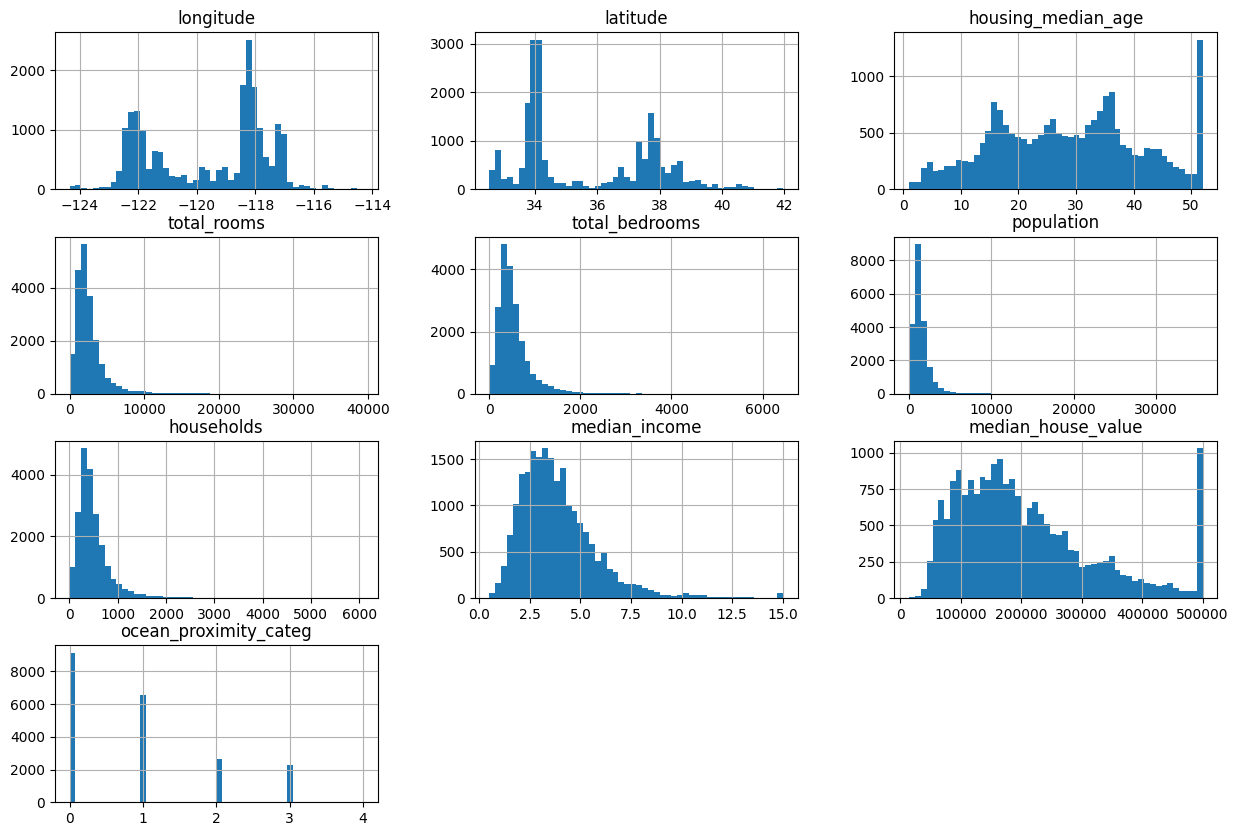

In [137]:
%%time
df.hist(figsize = (15,10), bins = 50);

In [19]:
%%time
sns.pairplot(df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 'population',
                           'households', 'median_income', 'median_house_value']])

CPU times: total: 8.38 s
Wall time: 8.4 s


Наблюдается несколько зависимостей между:
* **total_bedrooms** и **total_rooms**
* **population** и **total_rooms**
* **population** и **total_bedrooms**
* **households** и **total_rooms**
* **households** и **total_bedrooms**
* **households** и **population**

Также есть небольшая зависимость между целевой переменной **median_house_value** и **median_income**

CPU times: total: 1min 6s
Wall time: 1min 7s


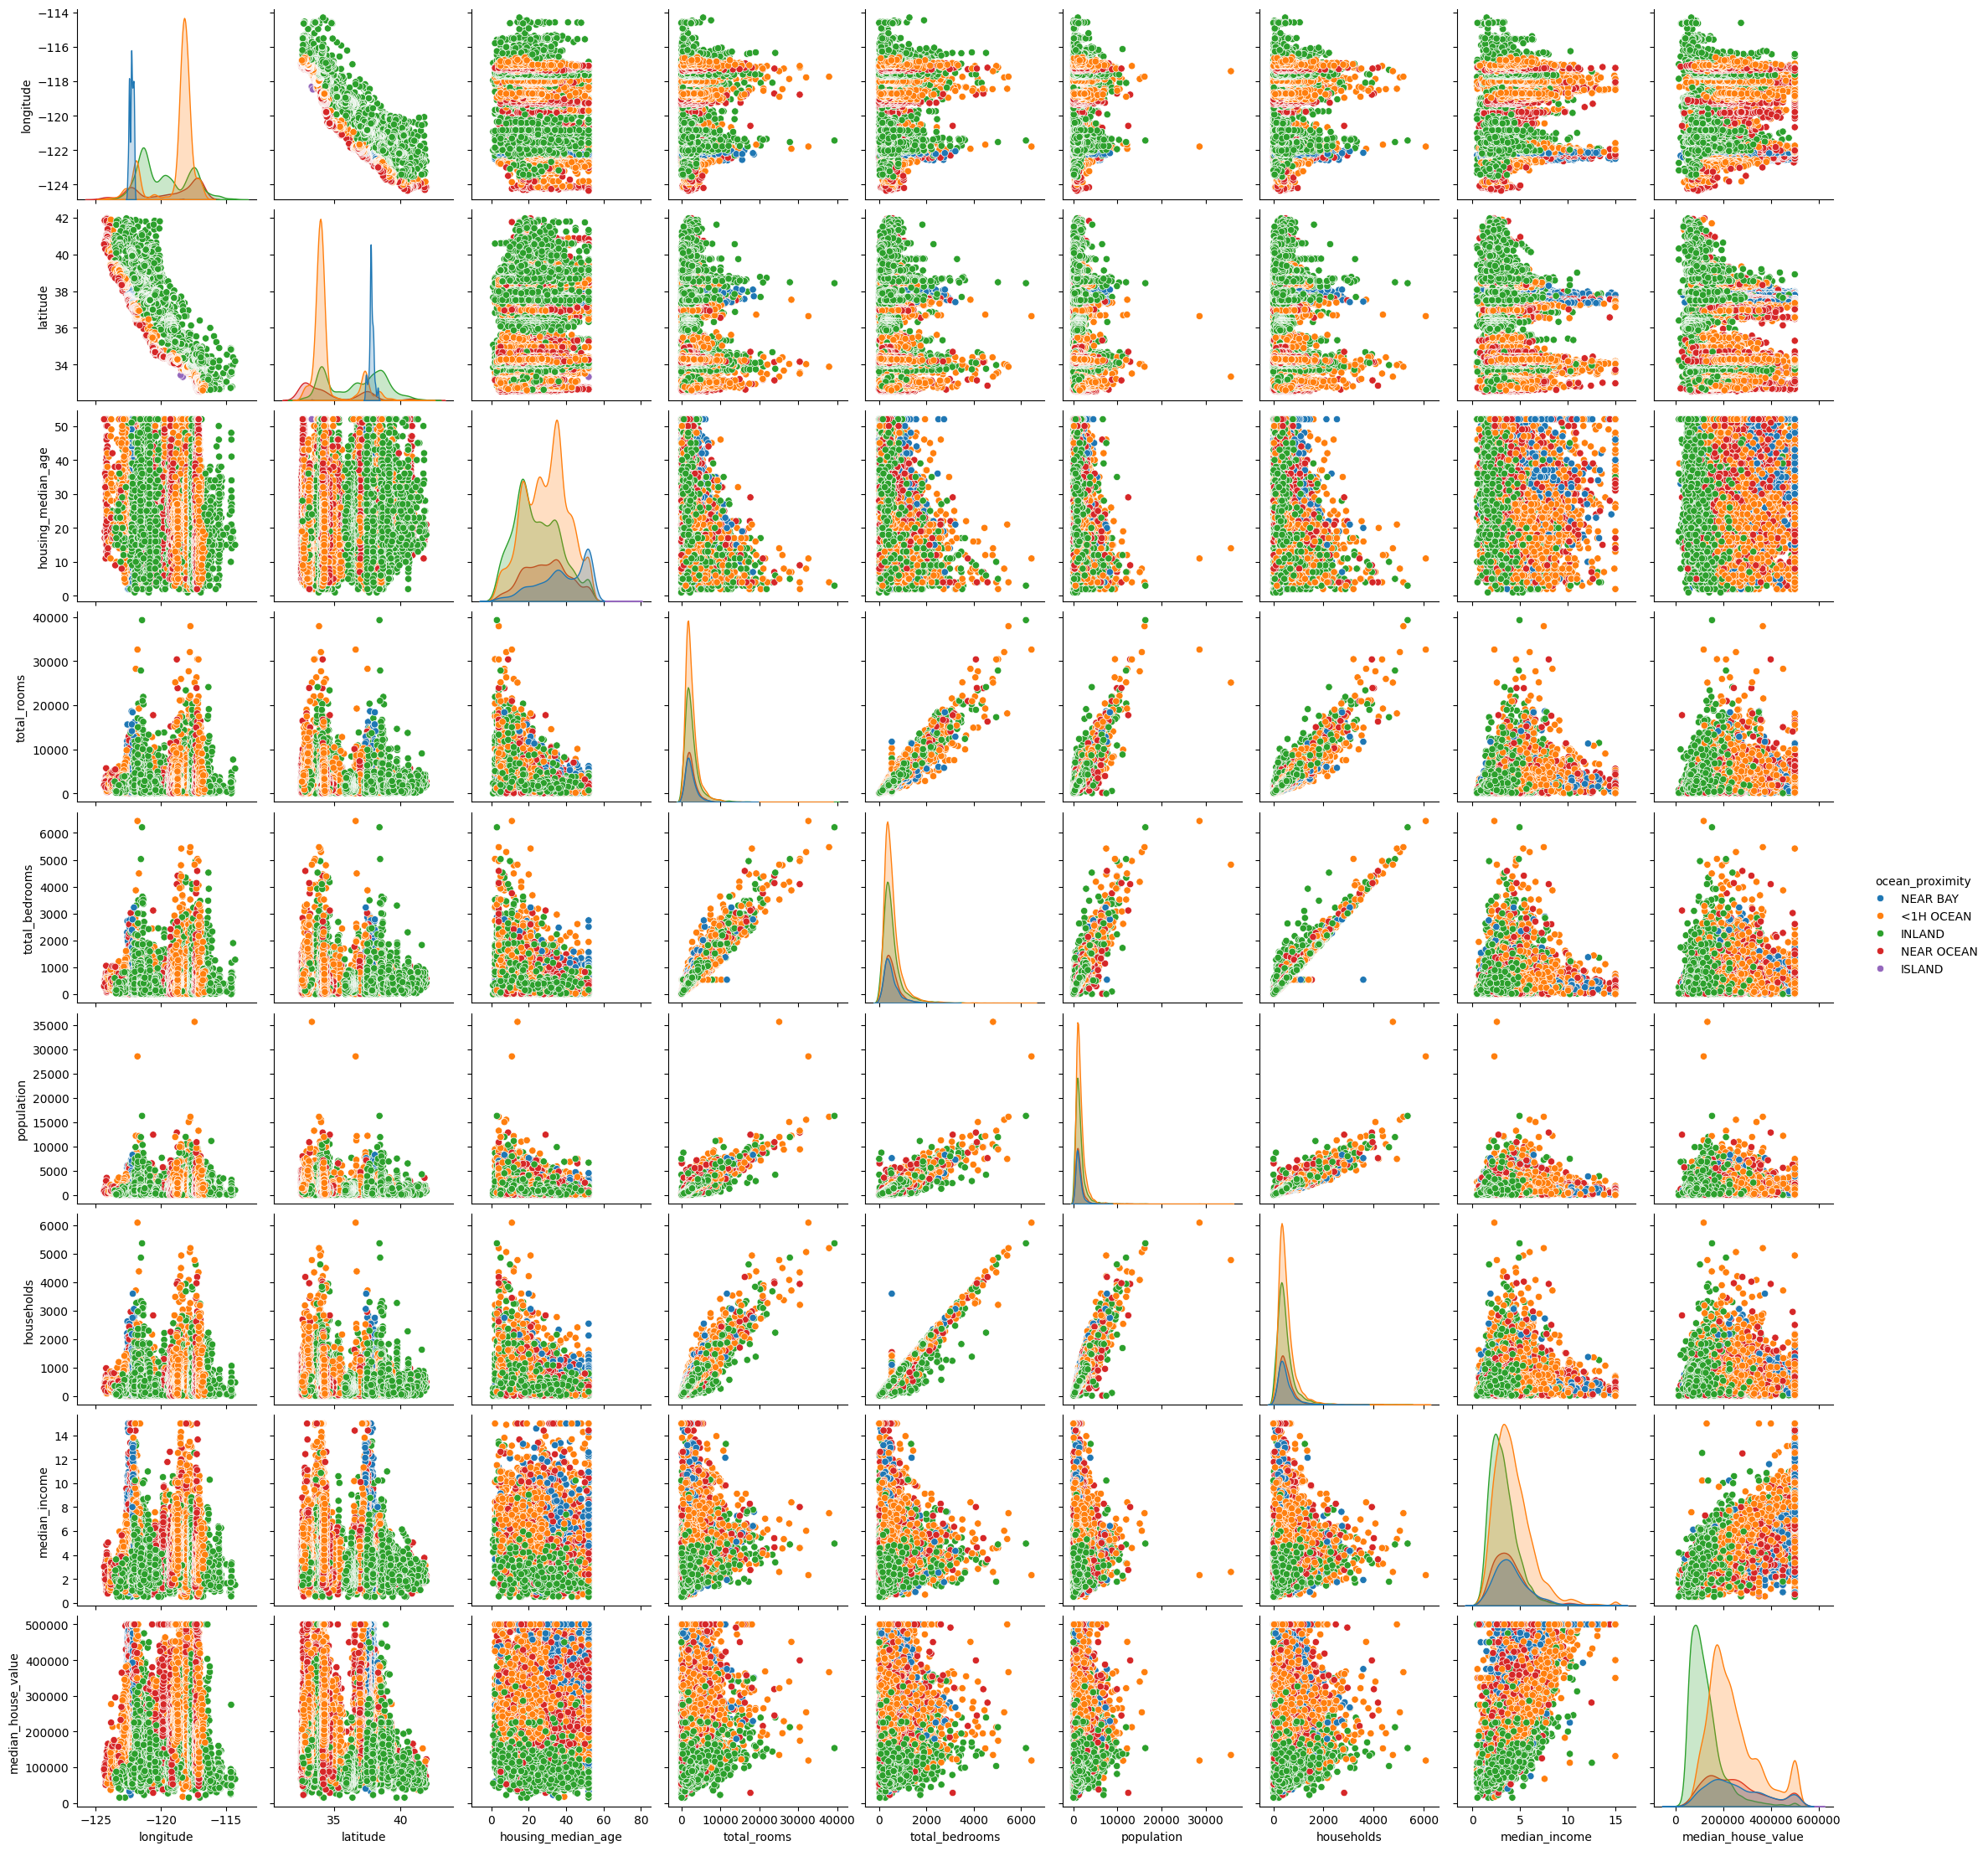

In [20]:
%%time
sns.pairplot(df[['longitude','latitude','housing_median_age',
                 'total_rooms','total_bedrooms', 
                 'population', 'households', 'median_income', 
                 'median_house_value', 'ocean_proximity']], hue='ocean_proximity')

In [138]:
# распределение населения кварталов
df['population'].hist()

<Axes: >

<Axes: >

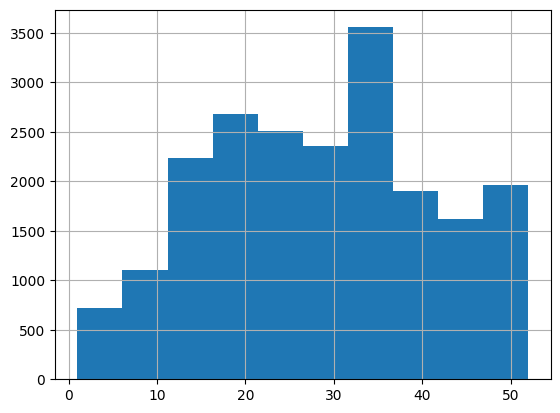

In [139]:
# распределение среднего возраста дома
df['housing_median_age'].hist()

In [140]:
df[df["housing_median_age"] > 50].count()

longitude                1321
latitude                 1321
housing_median_age       1321
total_rooms              1321
total_bedrooms           1321
population               1321
households               1321
median_income            1321
median_house_value       1321
ocean_proximity          1321
ocean_proximity_categ    1321
dtype: int64

<Axes: >

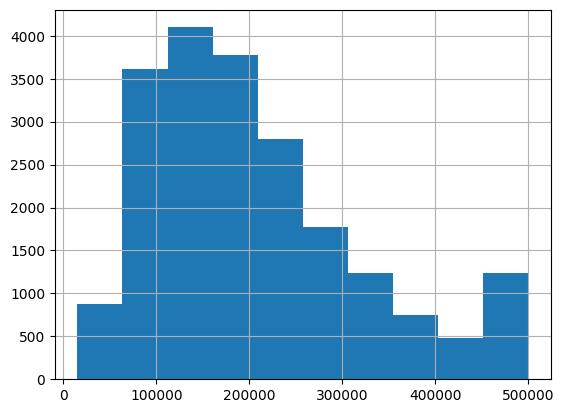

In [141]:
# распределение средней стоимости дома
df['median_house_value'].hist()

In [142]:
df[df["median_house_value"] > 500000].count()

longitude                965
latitude                 965
housing_median_age       965
total_rooms              965
total_bedrooms           965
population               965
households               965
median_income            965
median_house_value       965
ocean_proximity          965
ocean_proximity_categ    965
dtype: int64

Имеются небольшие завышенные значения в признаках **housing_median_age** и **median_house_value**.

### Тепловая карта

In [143]:
corr = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 'population',
                           'households', 'median_income', 'median_house_value', 'ocean_proximity_categ']].corr()
corr

longitude  latitude  housing_median_age  total_rooms   
longitude               1.000000 -0.924664           -0.108197     0.044568  \
latitude               -0.924664  1.000000            0.011173    -0.036100   
housing_median_age     -0.108197  0.011173            1.000000    -0.361262   
total_rooms             0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms          0.069260 -0.066659           -0.318998     0.927253   
population              0.099773 -0.108785           -0.296244     0.857126   
households              0.055310 -0.071035           -0.302916     0.918484   
median_income          -0.015176 -0.079809           -0.119034     0.198050   
median_house_value     -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity_categ  -0.439870  0.390957            0.145163    -0.016309   

                       total_bedrooms  population  households  median_income   
longitude                    0.069260    0.099773    0.055310      -0.015176  \
latitude                    -0.066659   -0.108785   -0.071035      -0.079809   
housing_median_age          -0.318998   -0.296244   -0.302916      -0.119034   
total_rooms                  0.927253    0.857126    0.918484       0.198050   
total_bedrooms               1.000000    0.873910    0.974725      -0.007682   
population                   0.873910    1.000000    0.907222       0.004834   
households                   0.974725    0.907222    1.000000       0.013033   
median_income               -0.007682    0.004834    0.013033       1.000000   
median_house_value           0.049454   -0.024650    0.065843       0.688075   
ocean_proximity_categ       -0.021358   -0.083537   -0.027144      -0.039673   

                       median_house_value  ocean_proximity_categ  
longitude                       -0.045967              -0.439870  
latitude                        -0.144160               0.390957  
housing_median_age               0.105623               0.145163  
total_rooms                      0.134153              -0.016309  
total_bedrooms                   0.049454              -0.021358  
population                      -0.024650              -0.083537  
households                       0.065843              -0.027144  
median_income                    0.688075              -0.039673  
median_house_value               1.000000               0.021732  
ocean_proximity_categ            0.021732               1.000000

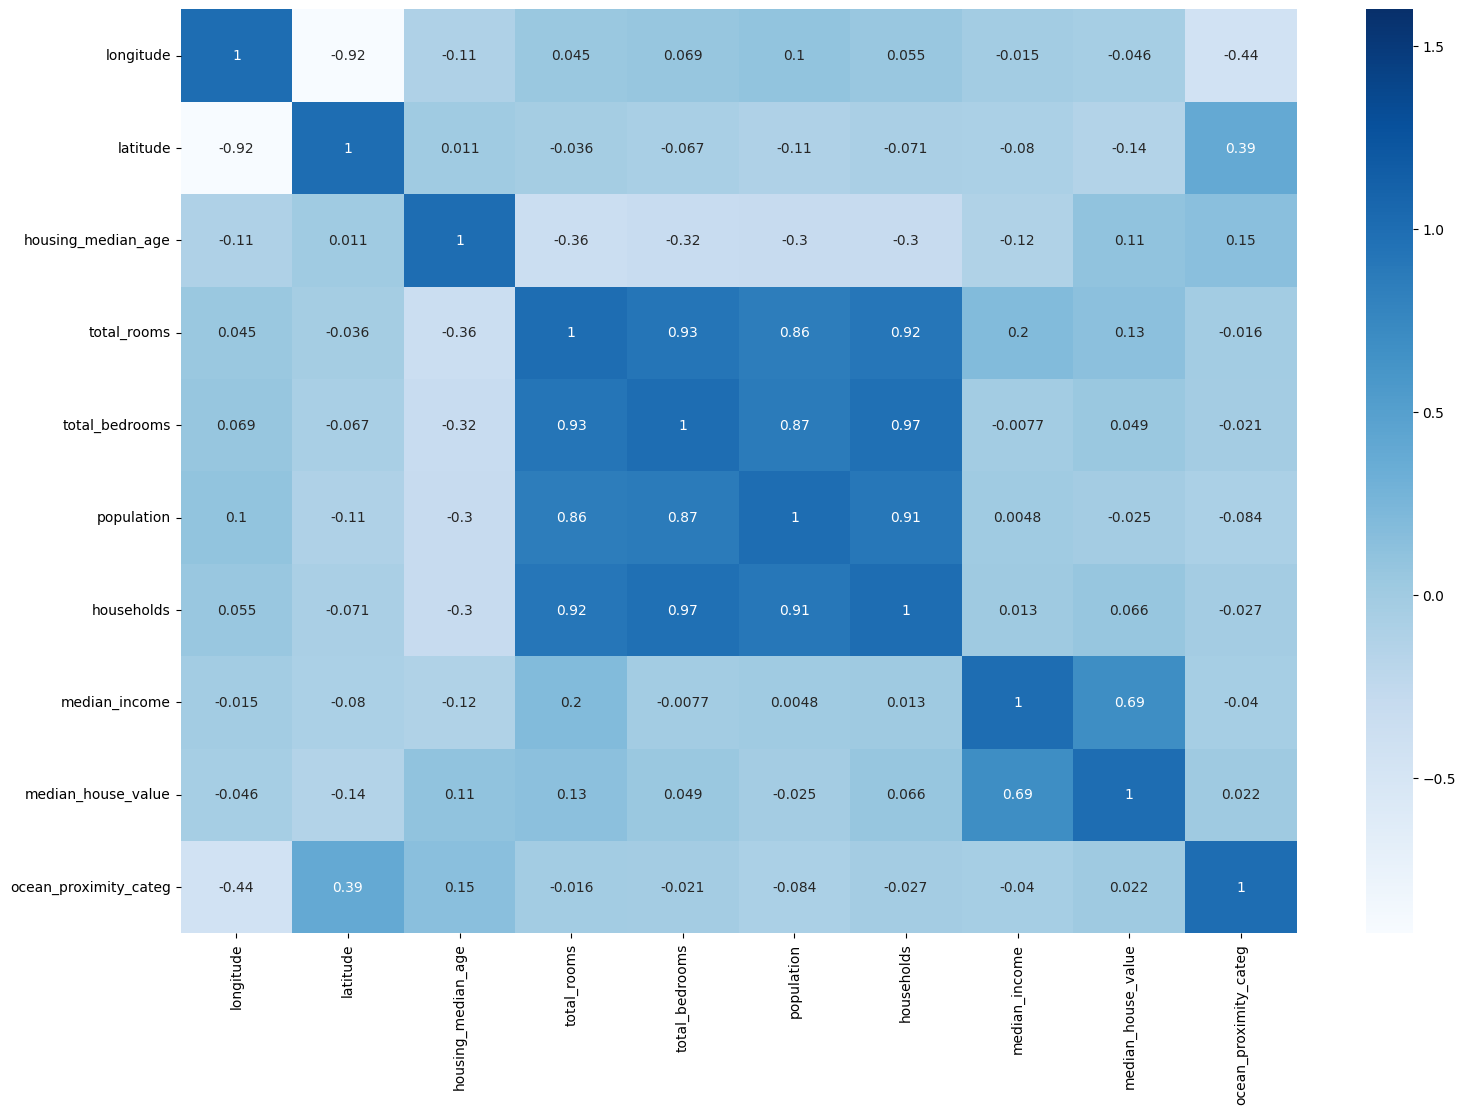

In [144]:
plt.figure(figsize = (18, 12))
sns.heatmap(corr, cmap = sns.color_palette("Blues", as_cmap=True),annot = True,vmax = 1.6);

Действительно наблюдается, несколько хороших зависимостей, между признаками  **population**, **households**,
**total_bedrooms** и **total_rooms**. \
Также есть слабая зависимость между **ocean_proximity_categ** и **latitude**

Между целевой переменной **median_house_value** и **median_income** имеется небольшая зависимость.

## Обучение моделей

In [405]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [407]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [409]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity   
0       322.0       126.0         8.3252            452600.0        NEAR BAY  \
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_categ  
0                      3  
1                      3  
2                      3  
3                      3  
4                      3

In [410]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(df[['longitude',
                                                               'latitude',
                                                               'housing_median_age',
                                                               'total_rooms',
                                                               'total_bedrooms',
                                                               'population',
                                                               'households',
                                                               'median_income',
                                                               'ocean_proximity_categ']],
                                                                df['median_house_value'],
                                                                test_size=0.3,
                                                                random_state=19)

### Преобработка данных

In [411]:
x_train_n.shape, x_test_n.shape

((14448, 9), (6192, 9))

In [412]:
y_train_n.shape, y_test_n.shape

((14448,), (6192,))

In [413]:
x_train_n.describe()

longitude      latitude  housing_median_age   total_rooms   
count  14448.000000  14448.000000        14448.000000  14448.000000  \
mean    -119.563833     35.621263           28.709925   2619.193176   
std        1.996523      2.120689           12.576096   2110.061564   
min     -124.300000     32.540000            1.000000      6.000000   
25%     -121.780000     33.940000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2124.500000   
75%     -118.010000     37.700000           37.000000   3122.250000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income   
count    14448.000000  14448.000000  14448.000000   14448.000000  \
mean       534.920266   1418.969338    497.095030       3.876189   
std        411.496254   1086.279794    374.135141       1.908850   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    792.000000    279.000000       2.568575   
50%        437.000000   1168.000000    409.000000       3.538250   
75%        640.000000   1720.000000    600.250000       4.750000   
max       6445.000000  28566.000000   6082.000000      15.000100   

       ocean_proximity_categ  
count           14448.000000  
mean                0.900401  
std                 0.999539  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 4.000000

In [414]:
x_test_n.describe()

longitude     latitude  housing_median_age   total_rooms   
count  6192.000000  6192.000000         6192.000000   6192.000000  \
mean   -119.583404    35.656591           28.475129   2674.426195   
std       2.019886     2.171121           12.607094   2339.802675   
min    -124.350000    32.550000            1.000000      2.000000   
25%    -121.820000    33.920000           18.000000   1442.000000   
50%    -118.500000    34.260000           28.000000   2133.000000   
75%    -118.007500    37.740000           37.000000   3208.000000   
max    -114.470000    41.950000           52.000000  39320.000000   

       total_bedrooms    population   households  median_income   
count     6192.000000   6192.000000  6192.000000    6192.000000  \
mean       544.758882   1440.660691   505.243863       3.857795   
std        436.816754   1233.474422   400.772605       1.878678   
min          2.000000      6.000000     2.000000       0.499900   
25%        297.000000    780.000000   280.750000       2.548600   
50%        440.000000   1160.000000   410.000000       3.529200   
75%        651.250000   1735.500000   611.000000       4.730200   
max       6210.000000  35682.000000  5358.000000      15.000100   

       ocean_proximity_categ  
count            6192.000000  
mean                0.928295  
std                 1.015958  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 4.000000

In [415]:
y_train_n

10789    236400.0
10240    218400.0
11287    214600.0
5494     500001.0
12556     67000.0
           ...   
6452     476700.0
1043     114200.0
1378     159700.0
17141    500001.0
10862    246000.0
Name: median_house_value, Length: 14448, dtype: float64

In [416]:
y_test_n

17578    293000.0
12660     97500.0
10979    233100.0
8775     308900.0
8803     500001.0
           ...   
1929     173400.0
15862    243300.0
8446     294800.0
971      332400.0
155      410300.0
Name: median_house_value, Length: 6192, dtype: float64

### Нормализация данных

In [417]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
mms2 = MinMaxScaler(feature_range=(0, 1))

In [418]:
x_train_nrm = pd.DataFrame(mms.fit_transform(x_train_n), columns=x_train_n.columns)
x_train_nrm.describe()

longitude      latitude  housing_median_age   total_rooms   
count  14448.000000  14448.000000        14448.000000  14448.000000  \
mean       0.474091      0.327446            0.543332      0.080108   
std        0.199852      0.225365            0.246590      0.064684   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.252252      0.148778            0.333333      0.044297   
50%        0.581582      0.182784            0.549020      0.064943   
75%        0.629630      0.548353            0.705882      0.095529   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income   
count    14448.000000  14448.000000  14448.000000   14448.000000  \
mean         0.082855      0.049574      0.081581       0.232844   
std          0.063857      0.038031      0.061525       0.131643   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.045934      0.027623      0.045716       0.142665   
50%          0.067660      0.040787      0.067094       0.209538   
75%          0.099162      0.060113      0.098545       0.293106   
max          1.000000      1.000000      1.000000       1.000000   

       ocean_proximity_categ  
count           14448.000000  
mean                0.225100  
std                 0.249885  
min                 0.000000  
25%                 0.000000  
50%                 0.250000  
75%                 0.250000  
max                 1.000000

In [419]:
x_test_nrm = pd.DataFrame(mms.transform(x_test_n), columns=x_train_n.columns)
x_test_nrm.describe()

longitude     latitude  housing_median_age  total_rooms   
count  6192.000000  6192.000000         6192.000000  6192.000000  \
mean      0.472132     0.331200            0.538728     0.081801   
std       0.202191     0.230725            0.247198     0.071727   
min      -0.005005     0.001063            0.000000    -0.000123   
25%       0.248248     0.146652            0.333333     0.044021   
50%       0.580581     0.182784            0.529412     0.065203   
75%       0.629880     0.552604            0.705882     0.098158   
max       0.983984     1.000000            1.000000     1.205175   

       total_bedrooms   population   households  median_income   
count     6192.000000  6192.000000  6192.000000    6192.000000  \
mean         0.084382     0.050333     0.082921       0.231576   
std          0.067787     0.043184     0.065906       0.129562   
min          0.000155     0.000105     0.000164       0.000000   
25%          0.045934     0.027203     0.046004       0.141288   
50%          0.068125     0.040507     0.067259       0.208914   
75%          0.100908     0.060655     0.100312       0.291741   
max          0.963532     1.249133     0.880941       1.000000   

       ocean_proximity_categ  
count            6192.000000  
mean                0.232074  
std                 0.253989  
min                 0.000000  
25%                 0.000000  
50%                 0.250000  
75%                 0.250000  
max                 1.000000

In [420]:
y_train_n

10789    236400.0
10240    218400.0
11287    214600.0
5494     500001.0
12556     67000.0
           ...   
6452     476700.0
1043     114200.0
1378     159700.0
17141    500001.0
10862    246000.0
Name: median_house_value, Length: 14448, dtype: float64

In [421]:
y_test_n

17578    293000.0
12660     97500.0
10979    233100.0
8775     308900.0
8803     500001.0
           ...   
1929     173400.0
15862    243300.0
8446     294800.0
971      332400.0
155      410300.0
Name: median_house_value, Length: 6192, dtype: float64

In [422]:
y_train_nrm = mms2.fit_transform(y_train_n.values.reshape(-1, 1))
y_train_nrm

array([[0.45649502],
       [0.41938178],
       [0.41154676],
       ...,
       [0.29835135],
       [1.        ],
       [0.47628876]])

In [423]:
y_test_nrm = mms2.transform(y_test_n.values.reshape(-1, 1))
y_test_nrm

array([[0.57319557],
       [0.17010445],
       [0.44969093],
       ...,
       [0.5769069 ],
       [0.65443235],
       [0.81505025]])

### Модель нейронной сети

In [463]:
model_v6 = keras.Sequential([keras.layers.Flatten(input_shape=(9,)),
                             keras.layers.Dense(2048, activation='relu'),
                             keras.layers.Dropout(0.3),
                             keras.layers.Dense(1024, activation='relu'),
                             keras.layers.Dropout(0.2),
                             keras.layers.Dense(512, activation='relu'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(256, activation='relu'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(128, activation='relu'),
                             keras.layers.Dense(64, activation='relu'),
                             keras.layers.Dense(32, activation='relu'),
                             keras.layers.Dense(16, activation='relu'),
                             keras.layers.Dense(8, activation='relu'),
                             keras.layers.Dense(4, activation='relu'),
                             keras.layers.Dense(1)])

#### Настройки модели

In [464]:
model_v6.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae']
)

In [465]:
model_v6.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 9)                 0         
                                                                 
 dense_142 (Dense)           (None, 2048)              20480     
                                                                 
 dropout_25 (Dropout)        (None, 2048)              0         
                                                                 
 dense_143 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_26 (Dropout)        (None, 1024)              0         
                                                                 
 dense_144 (Dense)           (None, 512)               524800    
                                                                 
 dropout_27 (Dropout)        (None, 512)             

#### Тренируем модель

In [466]:
# используем итеративный метод для избежания переобучения модели
early_stop = EarlyStopping(monitor='val_loss', patience=20)

In [467]:
%%time
hst_v2 = model_v6.fit(x_train_nrm, y_train_nrm, epochs=200, validation_data=(x_test_nrm, y_test_nrm), callbacks = [early_stop])
hst_v2

Epoch 1/200
452/452 [==============================] - 10s 20ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1165 - val_loss: 0.0220 - val_mse: 0.0220 - val_mae: 0.1004
Epoch 2/200
452/452 [==============================] - 9s 20ms/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1026 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.0926
Epoch 3/200
452/452 [==============================] - 9s 21ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1002 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0917
Epoch 4/200
452/452 [==============================] - 10s 22ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0958 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0900
Epoch 5/200
452/452 [==============================] - 9s 21ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0941 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0890
Epoch 6/200
452/452 [==============================] - 9s 20ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0947 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0879
Ep

#### Проверяем точность

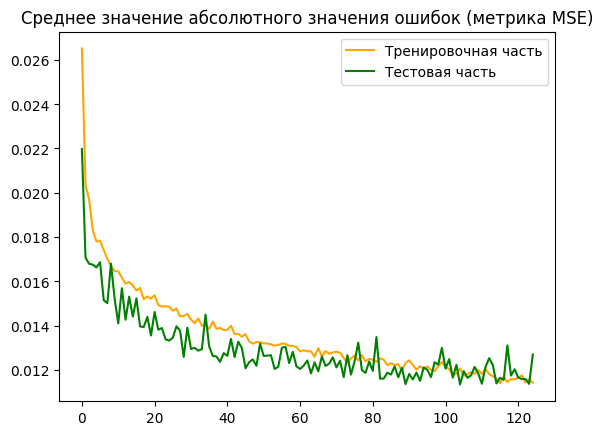

<Figure size 640x480 with 0 Axes>

In [468]:
acc = hst_v2.history['mse']
val_acc = hst_v2.history['val_mse']
loss = hst_v2.history['loss']
val_loss = hst_v2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Тренировочная часть')
plt.plot(epochs, val_acc, 'green', label='Тестовая часть')
plt.title('Среднее значение абсолютного значения ошибок (метрика MSE)')
plt.legend(loc=0)
plt.figure()


plt.show()

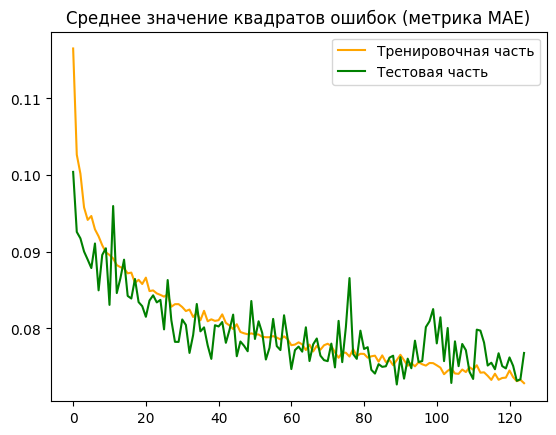

<Figure size 640x480 with 0 Axes>

In [469]:
acc = hst_v2.history['mae']
val_acc = hst_v2.history['val_mae']
loss = hst_v2.history['loss']
val_loss = hst_v2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Тренировочная часть')
plt.plot(epochs, val_acc, 'green', label='Тестовая часть')
plt.title('Среднее значение квадратов ошибок (метрика MAE)')
plt.legend(loc=0)
plt.figure()


plt.show()

In [470]:
predictions_v6 = model_v6.predict(x_test_nrm)

In [471]:
predictions_v6

array([[0.46554905],
       [0.178067  ],
       [0.37914592],
       ...,
       [0.5200522 ],
       [0.61411417],
       [0.8900804 ]], dtype=float32)

<Axes: >

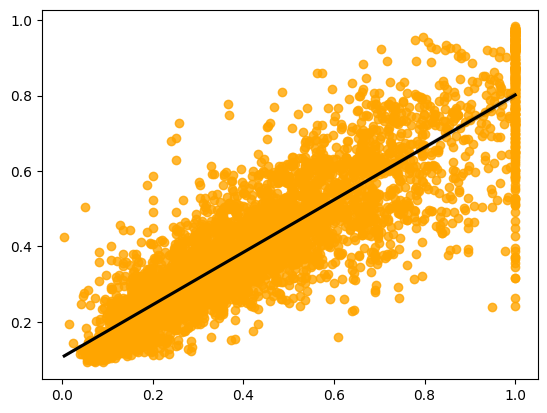

In [472]:
sns.regplot(x=y_test_nrm, y=predictions_v6, color='orange', line_kws={"color":"black"})

<Axes: ylabel='Density'>

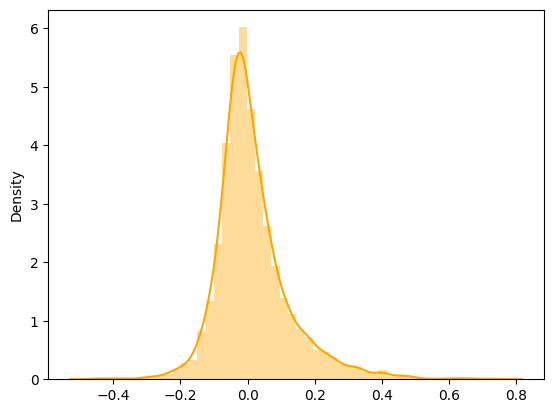

In [473]:
sns.distplot((y_test_nrm - predictions_v6), color='orange')

In [474]:
print('Метрики: \n' + '-' * 17)
print(f'MAE:      {sklearn.metrics.mean_absolute_error(y_test_nrm, predictions_v6):.5f}')
print(f'MSE:      {sklearn.metrics.mean_squared_error(y_test_nrm, predictions_v6):.5f}')
print(f'RMSE:     {np.sqrt(sklearn.metrics.mean_squared_error(y_test_nrm, predictions_v6)):.5f}')
print(f'R2_score: {sklearn.metrics.r2_score(y_test_nrm, predictions_v6):.5f}')

Метрики: 
-----------------
MAE:      0.07680
MSE:      0.01270
RMSE:     0.11269
R2_score: 0.77799


### KNeighborsRegressor

In [475]:
knn_v1 = KNeighborsRegressor()

In [476]:
%%time
knn_v1.fit(x_train_nrm, y_train_nrm)

CPU times: total: 31.2 ms
Wall time: 32 ms


KNeighborsRegressor()

In [477]:
knn_pred_test = knn_v1.predict(x_test_nrm)
knn_pred_test

array([[0.51348448],
       [0.13059946],
       [0.35975316],
       ...,
       [0.64420559],
       [0.56993786],
       [0.9260201 ]])

<Axes: >

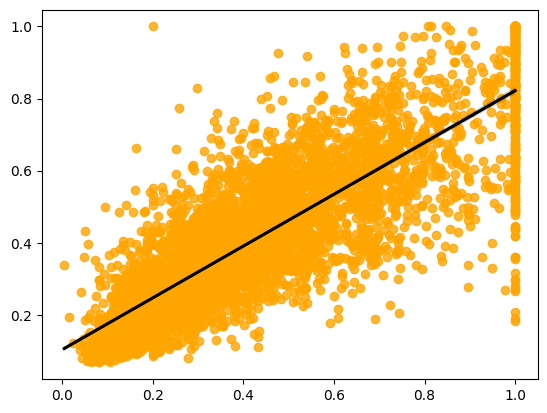

In [478]:
sns.regplot(x=y_test_nrm, y=knn_pred_test, color='orange', line_kws={"color":"black"})

<Axes: ylabel='Density'>

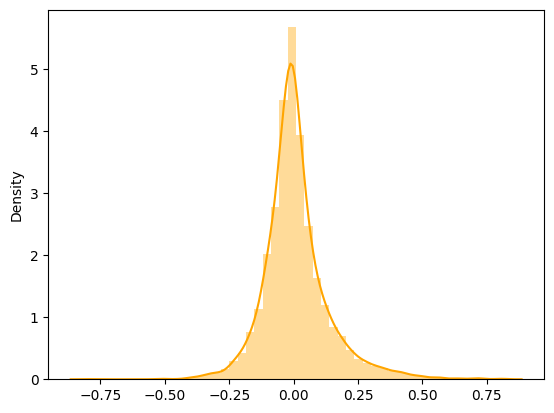

In [479]:
sns.distplot((y_test_nrm - knn_pred_test), color='orange')

In [480]:
print('Метрики: \n' + '-' * 17)
print(f'MAE:      {sklearn.metrics.mean_absolute_error(y_test_nrm, knn_pred_test):.5f}')
print(f'MSE:      {sklearn.metrics.mean_squared_error(y_test_nrm, knn_pred_test):.5f}')
print(f'RMSE:     {np.sqrt(sklearn.metrics.mean_squared_error(y_test_nrm, knn_pred_test)):.5f}')
print(f'R2_score: {sklearn.metrics.r2_score(y_test_nrm, knn_pred_test):.5f}')

Метрики: 
-----------------
MAE:      0.08653
MSE:      0.01627
RMSE:     0.12756
R2_score: 0.71555


### Сравнение моделей

In [483]:
print('Модель нейронной сети: \n')
print(f'MAE:      {sklearn.metrics.mean_absolute_error(y_test_nrm, predictions_v6):.5f}')
print(f'MSE:      {sklearn.metrics.mean_squared_error(y_test_nrm, predictions_v6):.5f}')
print(f'RMSE:     {np.sqrt(sklearn.metrics.mean_squared_error(y_test_nrm, predictions_v6)):.5f}')
print(f'R2_score: {sklearn.metrics.r2_score(y_test_nrm, predictions_v6):.5f}')
print('-' * 22 + '\n')

print('KNeighborsRegressor: \n')
print(f'MAE:      {sklearn.metrics.mean_absolute_error(y_test_nrm, knn_pred_test):.5f}')
print(f'MSE:      {sklearn.metrics.mean_squared_error(y_test_nrm, knn_pred_test):.5f}')
print(f'RMSE:     {np.sqrt(sklearn.metrics.mean_squared_error(y_test_nrm, knn_pred_test)):.5f}')
print(f'R2_score: {sklearn.metrics.r2_score(y_test_nrm, knn_pred_test):.5f}')
print('-' * 22)

Модель нейронной сети: 

MAE:      0.07680
MSE:      0.01270
RMSE:     0.11269
R2_score: 0.77799
----------------------

KNeighborsRegressor: 

MAE:      0.08653
MSE:      0.01627
RMSE:     0.12756
R2_score: 0.71555
----------------------


### Вывод
Для работы был использован датасет **«california_housing» (Цены на жильё в Калифорнии)**. \
Датасет состоит из **20640** записей и **10** признаков:
* longitude
* latitude
* housingMedianAge
* totalRooms
* totalBedrooms
* population
* households
* medianIncome
* oceanProximity

Целевая переменная:
* medianHouseValue

Были заполнены некоторые пропуски средним значением в колонке **totalBedrooms** \
В распределении данных наблюдаются небольшие завышенные значения в признаках **housing_median_age** и **median_house_value**. \
На тепловой карте есть несколько хороших зависимостей, между признаками  **population**, **households**,
**total_bedrooms** и **total_rooms**. 

Также между целевой переменной, имеется всего одна зависимость - **median_house_value** и **median_income** - **0.69**

Перед обучением моделей было проведено масштабирование данных, для более стабильного обучения моделей. \
В качестве масштабирования была выбрана нормализация. \
На основе нормализованной выборки было построено 2 модели машинного обучения:
* **Модель нейронной сети**
* **KNeighborsRegressor** 


Для обучения была использована модель нейронной сети состоящая из 12 слоев, и содержит свыше 2.8 миллиона параметров. С каждым слоем количество нейронов модели уменьшается в геометрической прогрессии. Также для избегания переобучения, во время обучения модели, были добавлены слои с отключением некоторых нейронов и использован метод EarlyStopping. На последнем слое модели для регрессии был использован слой без активации. \
Данный подход обеспечил совсем небольшой прирост в эффективности **Модели нейронной сети** перед **KNeighborsRegressor**, и не большое сокращение ошибок.


Показатели **Модели нейронной сети** составляют:
* **mae** - **0.07680**
* **mse** - **0.01270**
* **rmse** - **0.11269**

Показатель эффективности модели - **R2_score** - **0.77**


Показатели модели **KNeighborsRegressor** составляют:
* **mae** - **0.08653**
* **mse** - **0.01627**
* **rmse** - **0.12756**

Показатель эффективности модели - **R2_score** - **0.71**

В результате проделанной работы, удалось достичь совсем небольшого преимущества в эффективности **Модели нейронной сети** перед **KNeighborsRegressor**. Обе модели не показывают отличных результатов и совершают небольшие ошибки в обучении и предсказывании результатов.